In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('lending_club_loan_clean.csv', index_col=0)

In [8]:
df = df.sample(frac=0.1, random_state=101)

In [9]:
"""features and target"""
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [10]:
"""Split the data"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
"""Scaling and Normalization"""
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.44      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.91      0.72      0.77      7905
weighted avg       0.89      0.88      0.87      7905



Text(87.0, 0.5, 'Truth')

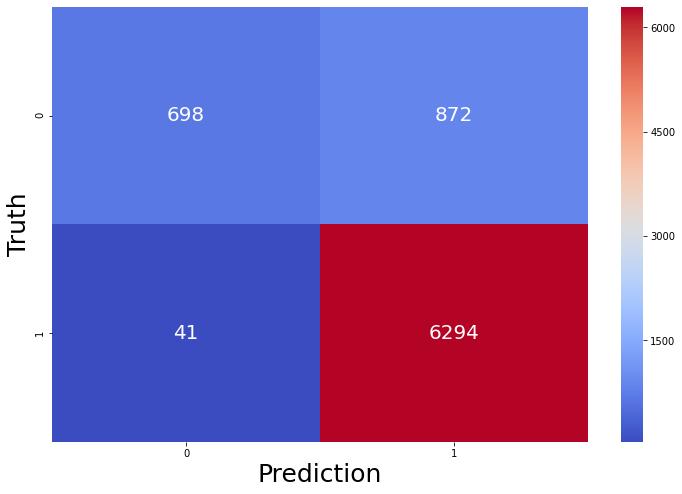

In [13]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)

print(classification_report(y_test, y_pred_log))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1570
           1       0.87      1.00      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.94      0.71      0.76      7905
weighted avg       0.90      0.88      0.86      7905



Text(87.0, 0.5, 'Truth')

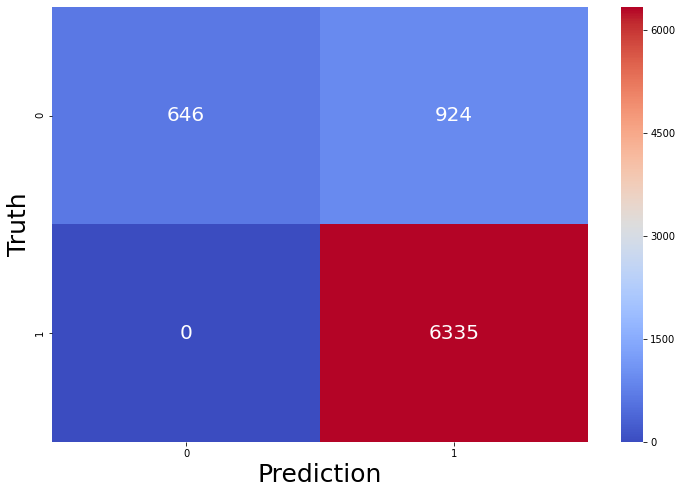

In [14]:
# support vector machine
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print(classification_report(y_test, y_pred_svc))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

In [21]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)

C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.883, total=  22.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.888, total=  19.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.887, total=  18.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.805, total= 2.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.805, total= 2.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total= 2.5min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.883, total=  19.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.888, total=  20.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.887, total=  20.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.883, total=  47.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 853.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [22]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1570
           1       0.87      1.00      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.94      0.71      0.76      7905
weighted avg       0.90      0.88      0.86      7905



Text(87.0, 0.5, 'Truth')

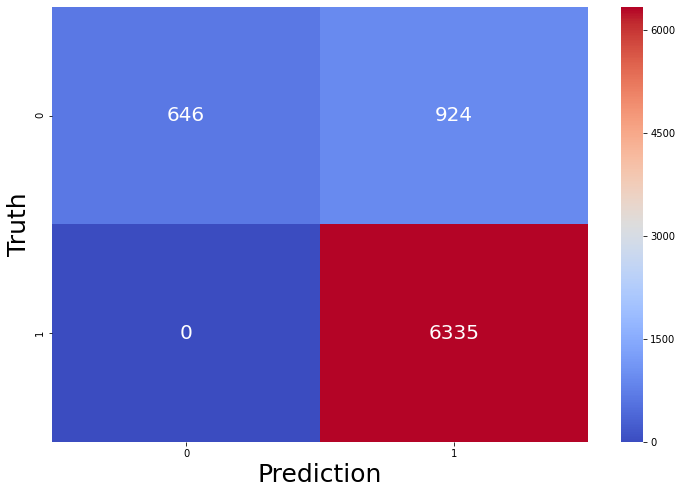

In [24]:
y_pred_svc_grid = grid.predict(X_test)
cm_svc_grid = confusion_matrix(y_test, y_pred_svc_grid)

print(classification_report(y_test, y_pred_svc_grid))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_svc_grid), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

              precision    recall  f1-score   support

           0       0.72      0.36      0.48      1570
           1       0.86      0.96      0.91      6335

    accuracy                           0.84      7905
   macro avg       0.79      0.66      0.70      7905
weighted avg       0.83      0.84      0.82      7905



Text(87.0, 0.5, 'Truth')

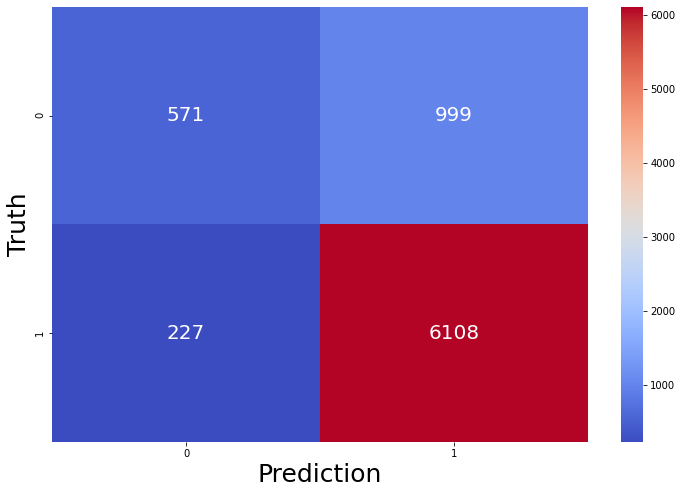

In [15]:
# knn
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(classification_report(y_test, y_pred_knn))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

              precision    recall  f1-score   support

           0       0.52      0.57      0.55      1570
           1       0.89      0.87      0.88      6335

    accuracy                           0.81      7905
   macro avg       0.71      0.72      0.71      7905
weighted avg       0.82      0.81      0.81      7905



Text(87.0, 0.5, 'Truth')

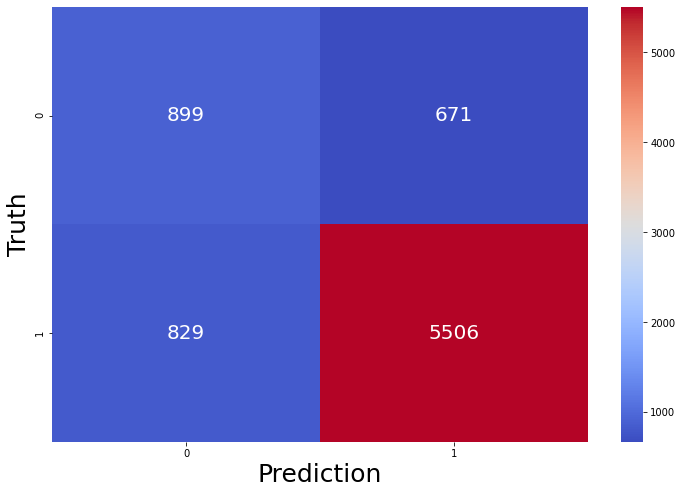

In [16]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

print(classification_report(y_test, y_pred_dtc))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.50      0.61      1570
           1       0.89      0.97      0.92      6335

    accuracy                           0.87      7905
   macro avg       0.84      0.73      0.77      7905
weighted avg       0.87      0.87      0.86      7905



Text(87.0, 0.5, 'Truth')

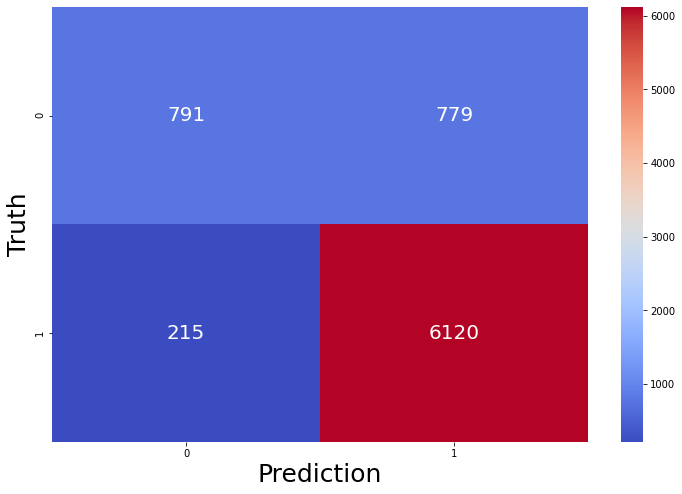

In [18]:
# random forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

print(classification_report(y_test, y_pred_rfc))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)

C:\Users\Victiny\anaconda3\envs\mytfenv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.48      0.61      1570
           1       0.88      0.98      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.86      0.73      0.77      7905
weighted avg       0.88      0.88      0.87      7905



Text(87.0, 0.5, 'Truth')

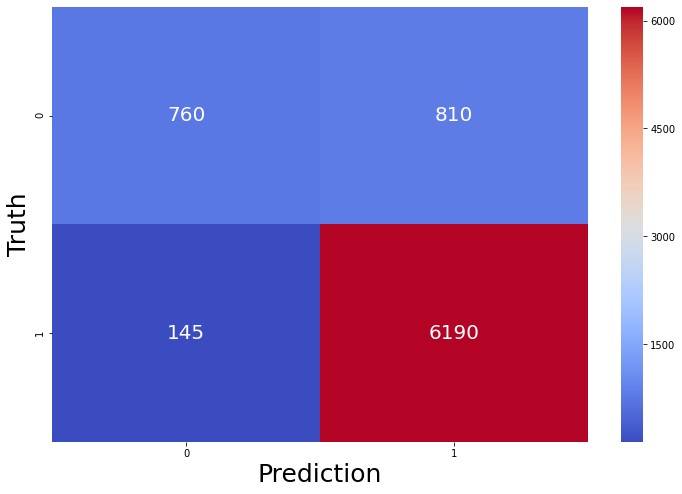

In [20]:
# XGBoost
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(classification_report(y_test, y_pred_xgb))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm', annot_kws={"fontsize":20})
plt.xlabel('Prediction', fontsize=25)
plt.ylabel('Truth', fontsize=25)